In [1]:
import time
# Start the timer
start_time = time.time()

!pip install pyspark
#!pip install chempy

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

NameError: name 'time' is not defined

In [4]:
# Start the timer
start_time = time.time()

# Import the necessary packages
#Third Party Packages

from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import *
#from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

from chempy.kinetics.ode import get_odesys
from chempy.kinetics.rates import MassAction
from chempy.kinetics.integrated import fixed
from chempy import Equilibrium, Substance
from scipy.optimize import fsolve

# Set seaborn style for better visualizations
sns.set(style="whitegrid")

# Define the SRM color mapping with the specified colors
srm_colors_custom = {
    1: "#f7e1a1",
    3: "#e9ad3f",
    5: "#d98416",
    9: "#b74d00",
    12: "#9f3400",
    16: "#811f00",
    22: "#5e0e00",
    29: "#410500",
    35: "#2f0200",
    65: "#0d0000"
}

# Convert the dictionary to a list of tuples (SRM value, color)
srm_color_list_custom = [(srm, color) for srm, color in srm_colors_custom.items()]

# Create a colormap from the SRM color list
srm_cmap_custom = mcolors.LinearSegmentedColormap.from_list("srm_cmap_custom", srm_color_list_custom)

# Register the colormap with matplotlib
#plt.register_cmap(cmap=srm_cmap_custom)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Data transformation execution time: 5.54 seconds


In [5]:
# Start the timer
start_time = time.time()

# Initialize Spark session (default)
#CPU1_spark = SparkSession.builder \
 #   .appName("Beer Quality Analysis") \
 #   .config("spark.sql.shuffle.partitions", "50") \
 #   .config("spark.executor.memory", "4g") \
 #   .config("spark.executor.cores", "4") \
 #   .getOrCreate()

# Initialize Spark session (optimized CPU)
spark = SparkSession.builder \
    .appName("Beer Quality Analysis") \
    .config("spark.sql.shuffle.partitions", "50") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "2") \
    .config("spark.driver.maxResultSize", "4g") \
    .getOrCreate()

# Initialize the Spark session (optimized GPU)
#T4_GPU_spark = SparkSession.builder \
 #   .appName("Beer Quality Analysis") \
 #   .config("spark.sql.shuffle.partitions", "100") \
 #   .config("spark.driver.memory", "16g") \
 #   .config("spark.executor.memory", "8g") \
 #   .config("spark.executor.cores", "4") \
 #   .config("spark.driver.maxResultSize", "8g") \
 #   .config("spark.executor.instances", "1") \
 #   .getOrCreate()

# Print Spark configuration settings
print(spark.sparkContext.getConf().getAll())


# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

[('spark.driver.port', '44407'), ('spark.app.id', 'local-1720386180623'), ('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'), ('spark.executor.memory', '4g'),

In [6]:
# Start the timer
start_time = time.time()

# Load data set
beer_sample_set = spark.read.csv('sample_data/beer_sample_set.csv', header=True, inferSchema=True)

# Preview the dataset shape and first few rows
print("Dataset shape: Rows -", beer_sample_set.count(), " Columns -", len(beer_sample_set.columns))
print("Schema of the dataset:")
beer_sample_set.printSchema()

print("First few rows of the dataset:")
beer_sample_set.show(5)  # Show the first 5 rows

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Dataset shape: Rows - 250000  Columns - 20
Schema of the dataset:
root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- pH_Level: double (nullable = true)
 |-- Gravity: double (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: double (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Brewhouse_Efficiency: double (nullable = true)
 |-- Loss_During_Brewing: double (nullable = true)
 |-- Loss_During_Fermentation: double (nullable = true)
 |-- Loss_During_Bottling_Kegging: double (nullable = true)

First few rows of the d

In [7]:
# Start the timer
start_time = time.time()

# Get summary: schema, number of rows, and summary statistics
print("Schema of the dataset:")
beer_sample_set.printSchema()

print("Number of rows:", beer_sample_set.count())

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Schema of the dataset:
root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- pH_Level: double (nullable = true)
 |-- Gravity: double (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: double (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Brewhouse_Efficiency: double (nullable = true)
 |-- Loss_During_Brewing: double (nullable = true)
 |-- Loss_During_Fermentation: double (nullable = true)
 |-- Loss_During_Bottling_Kegging: double (nullable = true)

Number of rows: 250000
Data transformation execution time: 0.87 se

In [8]:
# Start the timer
start_time = time.time()

# Create a copy of the DataFrame by assigning it to a new variable
beer_copy = beer_sample_set

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


Data transformation execution time: 0.00 seconds


In [9]:
# Start the timer
start_time = time.time()

# Compute summary statistics
describe_df = beer_copy.describe()

# Show the summary statistics
describe_df.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

+-------+---------------+----------+-------+---------------+-----------------+------------------+------------------+--------------------+------------------+------------------+-----------------+----------------+------------------+------------------+------------------+--------------------+-------------------+------------------------+----------------------------+
|summary|       Batch_ID|Beer_Style|    SKU|       Location|Fermentation_Time|       Temperature|          pH_Level|             Gravity|   Alcohol_Content|        Bitterness|            Color|Ingredient_Ratio|   Volume_Produced|       Total_Sales|     Quality_Score|Brewhouse_Efficiency|Loss_During_Brewing|Loss_During_Fermentation|Loss_During_Bottling_Kegging|
+-------+---------------+----------+-------+---------------+-----------------+------------------+------------------+--------------------+------------------+------------------+-----------------+----------------+------------------+------------------+------------------+-------

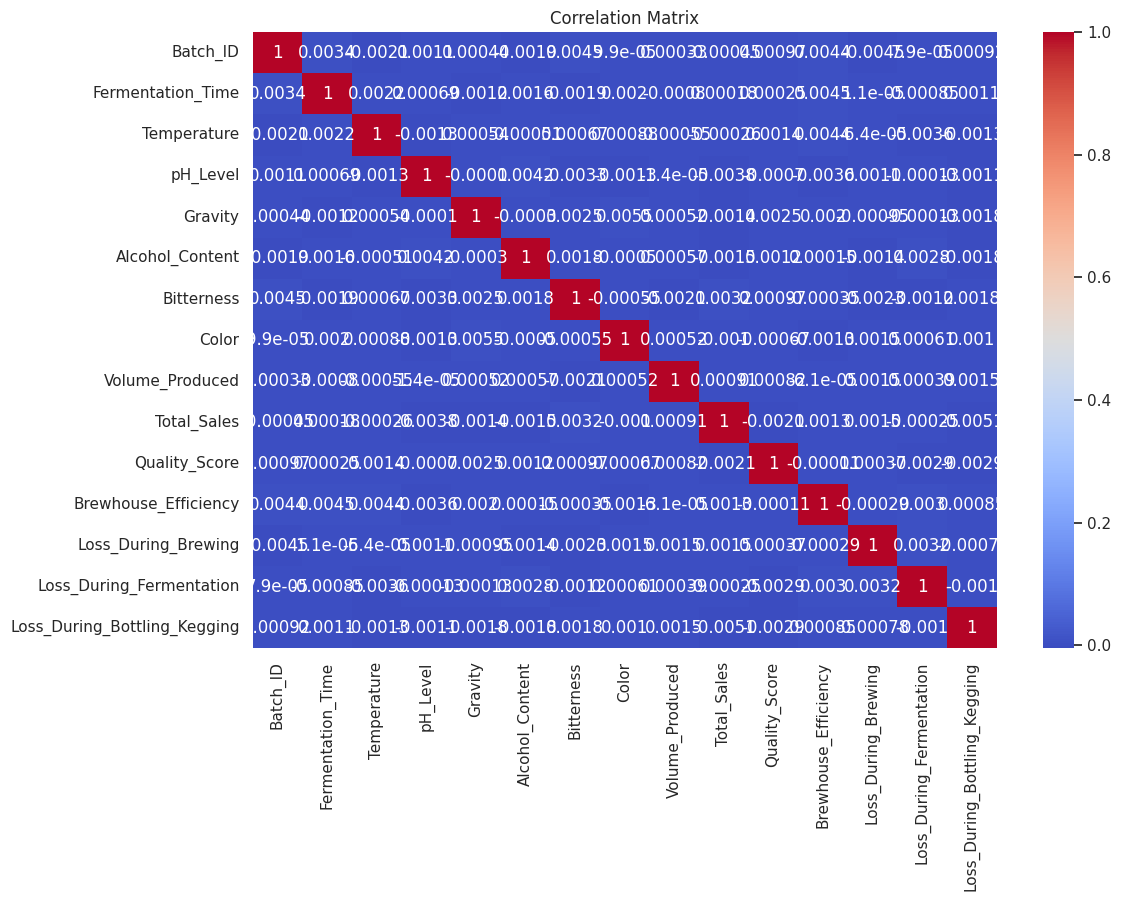

Data transformation execution time: 264.85 seconds


In [10]:
# Start the timer
start_time = time.time()

from pyspark.sql.types import IntegerType, FloatType, DoubleType

# Select numeric columns
numeric_columns = [field.name for field in beer_copy.schema.fields if isinstance(field.dataType, (IntegerType, FloatType, DoubleType))]

# Compute the correlation matrix
corr_matrix = pd.DataFrame(columns=numeric_columns, index=numeric_columns)

for col1 in numeric_columns:
    for col2 in numeric_columns:
        corr_value = beer_copy.stat.corr(col1, col2)
        corr_matrix.at[col1, col2] = corr_value

# Convert the correlation matrix to float
corr_matrix = corr_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")



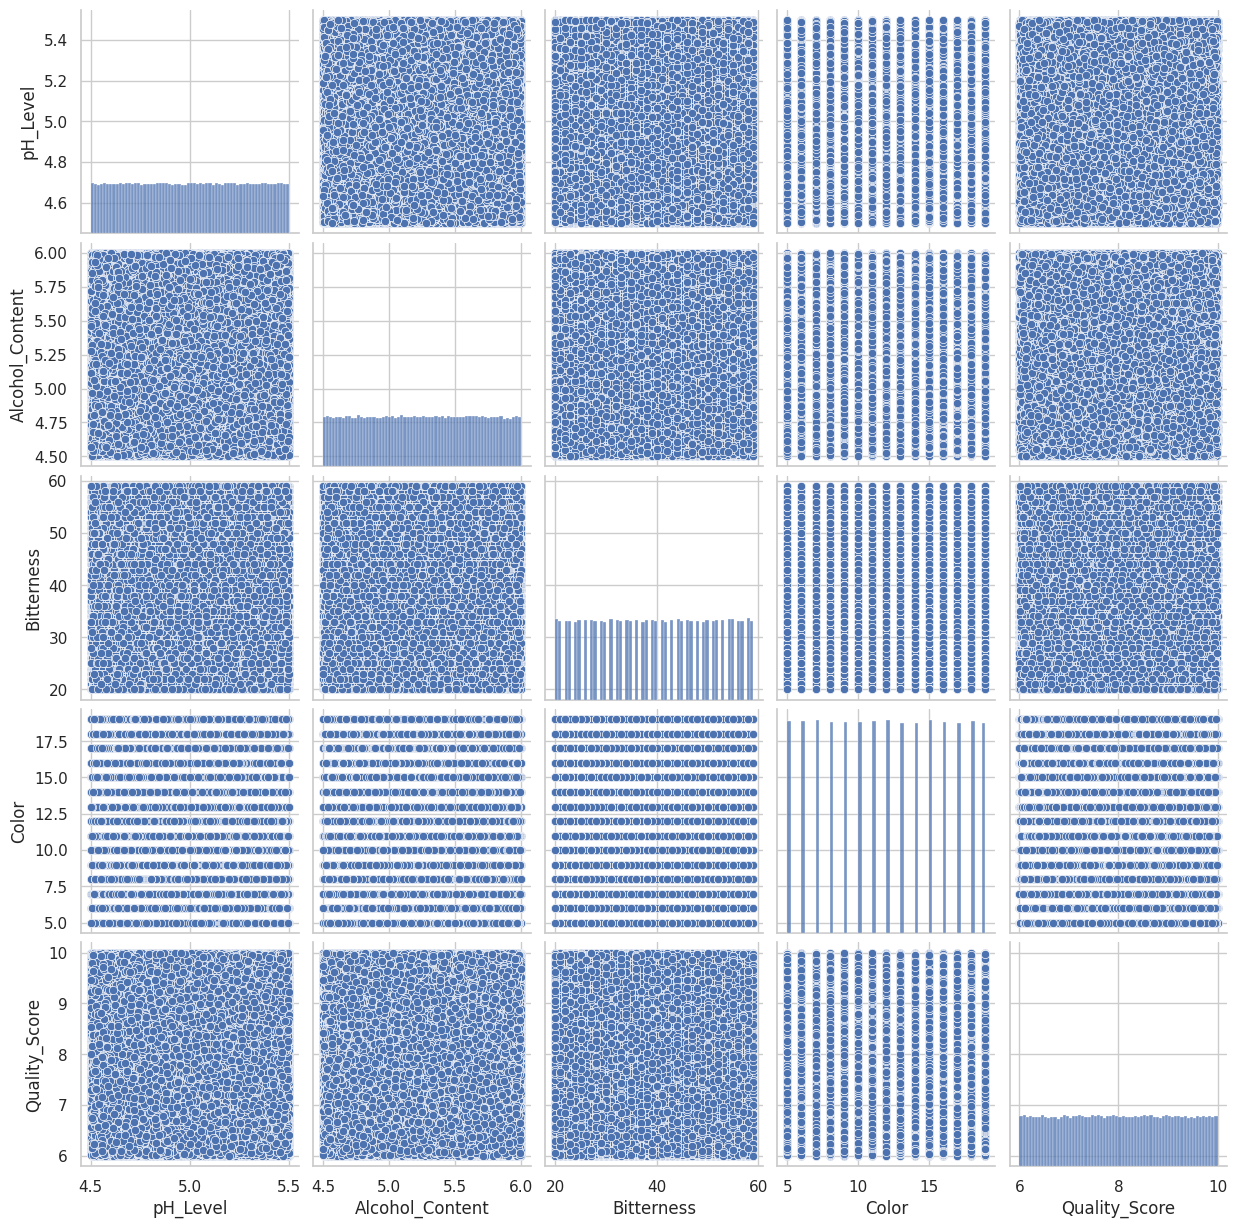

Data transformation execution time: 29.23 seconds


In [11]:
# Start the timer
start_time = time.time()

# Select relevant numerical columns
numeric_columns = ['pH_Level', 'Alcohol_Content', 'Bitterness', 'Color', 'Quality_Score']

# Collect the data as a Pandas DataFrame
beer_sample_pandas = beer_copy.select(numeric_columns).toPandas()

# Plot the pair plot
sns.pairplot(beer_sample_pandas)
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


In [12]:
# Start the timer
start_time = time.time()

from pyspark.sql import functions as F
# Define the columns relevant for feature engineering (features that contain chemistry dependent properties)
relevant_columns = ['pH_Level', 'Ingredient_Ratio', 'Fermentation_Time', 'Temperature',
                    'Alcohol_Content', 'Bitterness', 'Color', 'Quality_Score']
categorical_columns = ['Beer_Style']

# Create a subset of the data with relevant columns
beer_quality_predict = beer_copy.select(relevant_columns + categorical_columns)

# Preview the subset of the data
print("Subset of the data with relevant columns:")
beer_quality_predict.show(5)

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Subset of the data with relevant columns:
+-----------------+----------------+-----------------+------------------+-----------------+----------+-----+------------------+----------+
|         pH_Level|Ingredient_Ratio|Fermentation_Time|       Temperature|  Alcohol_Content|Bitterness|Color|     Quality_Score|Beer_Style|
+-----------------+----------------+-----------------+------------------+-----------------+----------+-----+------------------+----------+
|4.944503974002884|     1:0.26:0.17|               15|15.070090125033419|5.104898993833054|        20|   19| 6.366748257130027|     Stout|
|5.403599353484238|     1:0.31:0.10|               19|15.563834668876087|5.075242393138411|        57|   14| 6.895412756770233|Wheat Beer|
|4.660538882478159|     1:0.32:0.21|               18|17.472288049501394|4.864122014861875|        20|    9| 6.964136947062722|      Sour|
|4.771273358916878|     1:0.32:0.24|               14|19.652671578475804|  5.8312391872117|        20|   19|6.68324419216492

In [13]:
# Start the timer
start_time = time.time()

# Show schema of the DataFrame
beer_quality_predict.printSchema()

# Show summary statistics for numerical columns
beer_quality_predict.describe().show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


root
 |-- pH_Level: double (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Beer_Style: string (nullable = true)

+-------+------------------+----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+----------+
|summary|          pH_Level|Ingredient_Ratio|Fermentation_Time|       Temperature|   Alcohol_Content|        Bitterness|            Color|     Quality_Score|Beer_Style|
+-------+------------------+----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+----------+
|  count|            250000|          250000|           250000|            250000|         

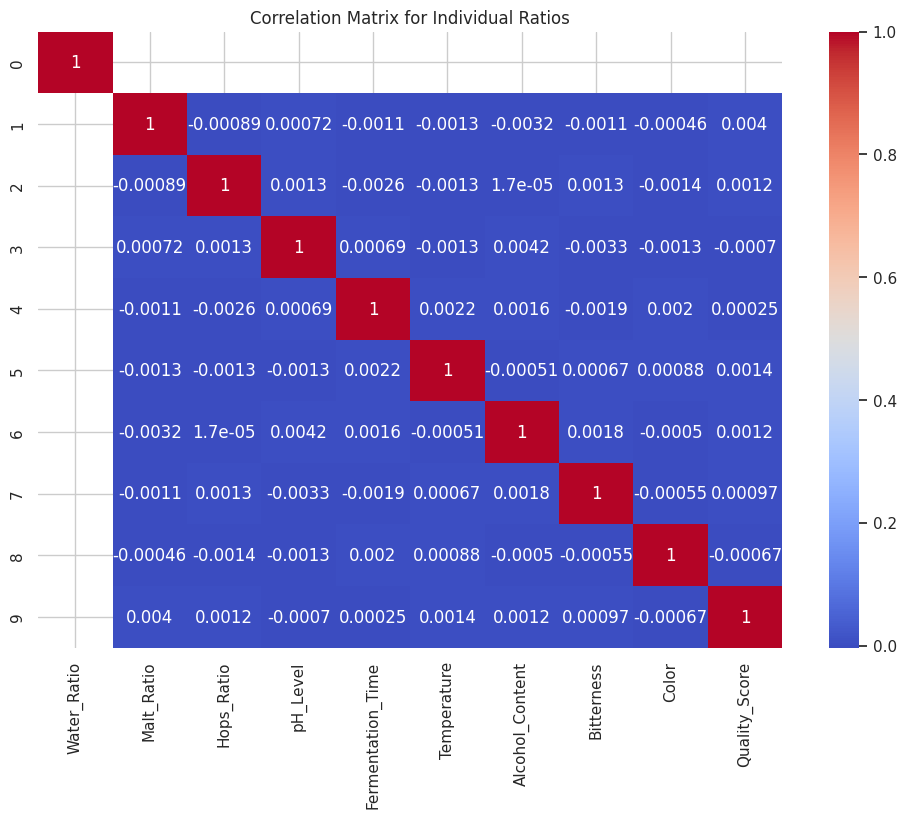

Data transformation execution time: 15.43 seconds


In [14]:
# Start the timer
start_time = time.time()

from pyspark.sql.functions import col, split, lit
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Extract Individual Components
beer_quality_predict = beer_quality_predict.withColumn('Water_Ratio', lit(1.0))
beer_quality_predict = beer_quality_predict.withColumn('Malt_Ratio', split(col('Ingredient_Ratio'), ':').getItem(1).cast('float'))
beer_quality_predict = beer_quality_predict.withColumn('Hops_Ratio', split(col('Ingredient_Ratio'), ':').getItem(2).cast('float'))

# Assemble all relevant features into a vector
vector_col = 'features'
assembler = VectorAssembler(inputCols=['Water_Ratio', 'Malt_Ratio', 'Hops_Ratio', 'pH_Level', 'Fermentation_Time', 'Temperature',
                                       'Alcohol_Content', 'Bitterness', 'Color', 'Quality_Score'], outputCol=vector_col)
df_vector = assembler.transform(beer_quality_predict).select(vector_col)

# Calculate Correlation Matrix
matrix = Correlation.corr(df_vector, vector_col).head()[0]
corr_matrix_indv = pd.DataFrame(matrix.toArray(), columns=['Water_Ratio', 'Malt_Ratio', 'Hops_Ratio', 'pH_Level', 'Fermentation_Time', 'Temperature',
                                                           'Alcohol_Content', 'Bitterness', 'Color', 'Quality_Score'])

# Visualize Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_indv, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Individual Ratios')
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


In [15]:
# Start the timer
start_time = time.time()

# Create Combined Ratio Feature
beer_quality_predict = beer_quality_predict.withColumn('Malt_Hops_Ratio', col('Malt_Ratio') / col('Hops_Ratio'))

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Data transformation execution time: 0.05 seconds


In [16]:
# Start the timer
start_time = time.time()

from pyspark.sql.functions import when, col
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Function to infer malt type from color
beer_quality_predict = beer_quality_predict.withColumn(
    'Malt_Type',
    when(col('Color') < 10, 'Barley')
    .when((col('Color') >= 10) & (col('Color') < 20), 'Wheat')
    .when((col('Color') >= 20) & (col('Color') < 30), 'Rye')
    .otherwise('Oats')
)

# Function to infer hops type from bitterness
beer_quality_predict = beer_quality_predict.withColumn(
    'Hops_Type',
    when(col('Bitterness') > 40, 'Bittering')
    .when((col('Bitterness') > 20) & (col('Bitterness') <= 40), 'Dual Purpose')
    .otherwise('Aroma')
)

# Show the updated DataFrame with the new engineered features
beer_quality_predict.select('Color', 'Malt_Type', 'Bitterness', 'Hops_Type').show(5)

# One-hot encode categorical variables for machine learning models
categorical_columns = ['Beer_Style', 'Malt_Type', 'Hops_Type']

# Create a list to hold the stages of the Pipeline
stages = []

# Loop through each categorical column and create a StringIndexer and OneHotEncoder for each
for col in categorical_columns:
    indexer = StringIndexer(inputCol=col, outputCol=col + '_Index')
    encoder = OneHotEncoder(inputCol=col + '_Index', outputCol=col + '_Vec')
    stages += [indexer, encoder]

# Apply the stages of the Pipeline to the DataFrame
pipeline = Pipeline(stages=stages)
beer_encoded = pipeline.fit(beer_quality_predict).transform(beer_quality_predict)

# Show the resulting DataFrame with the one-hot encoded columns
print("One-hot encoded dataframe:")
beer_encoded.select([col for col in beer_encoded.columns if 'Vec' in col]).show()

# Preview the entire DataFrame
beer_encoded.show()

#Ales: 62-75 °F (17-24 °C)
#Lagers: 46-58 °F (8-14 °C) #assume dark lagers in this project
#Wheat and Belgian styles: 62-85 °F (17-29 °C), ales divided into these categories

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


+-----+---------+----------+------------+
|Color|Malt_Type|Bitterness|   Hops_Type|
+-----+---------+----------+------------+
|   19|    Wheat|        20|       Aroma|
|   14|    Wheat|        57|   Bittering|
|    9|   Barley|        20|       Aroma|
|   19|    Wheat|        20|       Aroma|
|   17|    Wheat|        37|Dual Purpose|
+-----+---------+----------+------------+
only showing top 5 rows

One-hot encoded dataframe:
+--------------+-------------+-------------+
|Beer_Style_Vec|Malt_Type_Vec|Hops_Type_Vec|
+--------------+-------------+-------------+
| (7,[2],[1.0])|(1,[0],[1.0])|    (2,[],[])|
| (7,[0],[1.0])|(1,[0],[1.0])|(2,[1],[1.0])|
| (7,[3],[1.0])|    (1,[],[])|    (2,[],[])|
| (7,[6],[1.0])|(1,[0],[1.0])|    (2,[],[])|
| (7,[4],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|
| (7,[2],[1.0])|    (1,[],[])|(2,[0],[1.0])|
| (7,[0],[1.0])|    (1,[],[])|(2,[0],[1.0])|
| (7,[5],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|
| (7,[2],[1.0])|(1,[0],[1.0])|(2,[1],[1.0])|
|     (7,[],[])|    (1,[],[])|

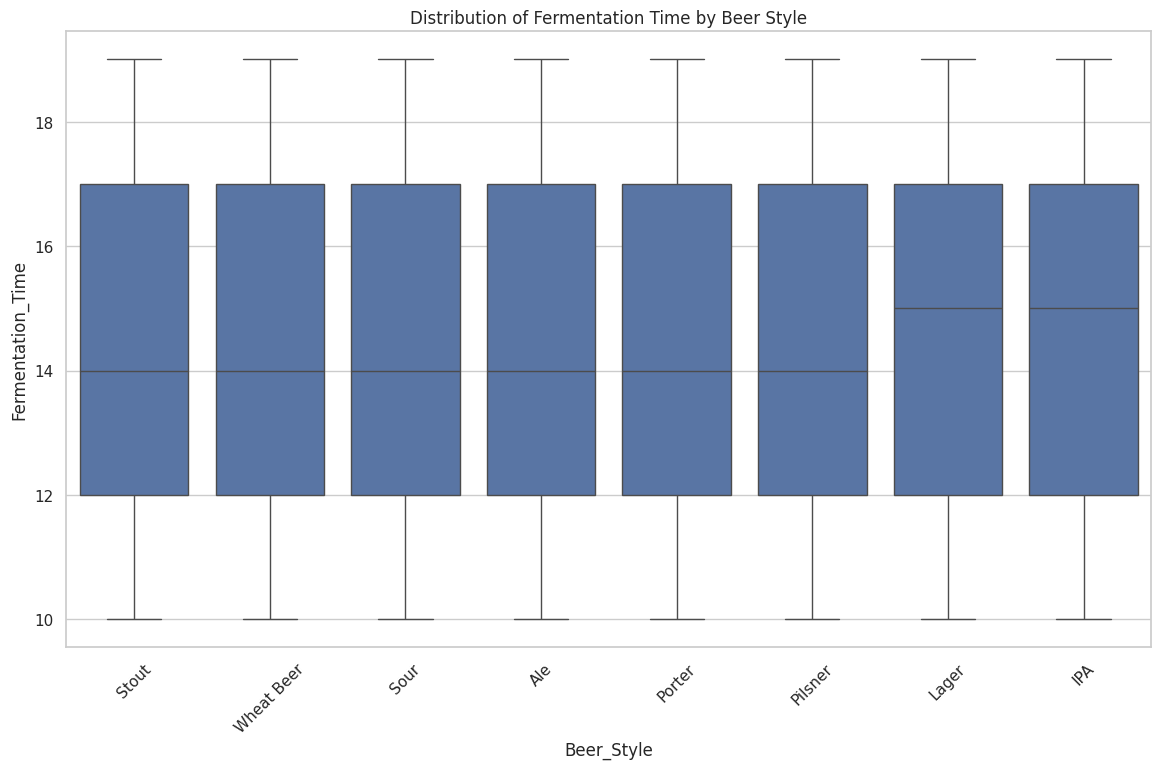

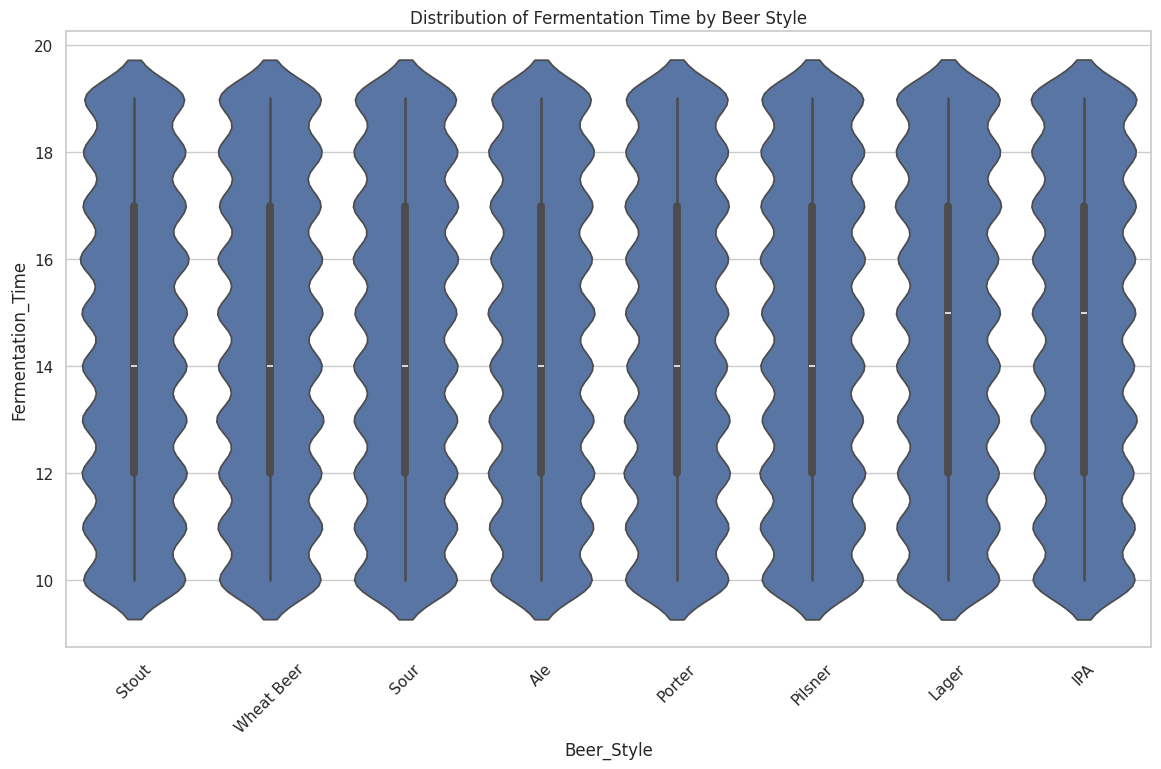

Data transformation execution time: 8.15 seconds


In [17]:
# Start the timer
start_time = time.time()

# Does Beer_Style feature distribute consistently into the
#Fermentation_Time feature?

# Extract relevant columns
ferment_style_comp = beer_quality_predict.select('Beer_Style', 'Fermentation_Time')

# Convert to Pandas DataFrame for plotting
ferment_style_comp_pd = ferment_style_comp.toPandas()

# Create a box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Beer_Style', y='Fermentation_Time', data=ferment_style_comp_pd)
plt.title('Distribution of Fermentation Time by Beer Style')
plt.xticks(rotation=45)
plt.show()

# Create a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='Beer_Style', y='Fermentation_Time', data=ferment_style_comp_pd)
plt.title('Distribution of Fermentation Time by Beer Style')
plt.xticks(rotation=45)
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

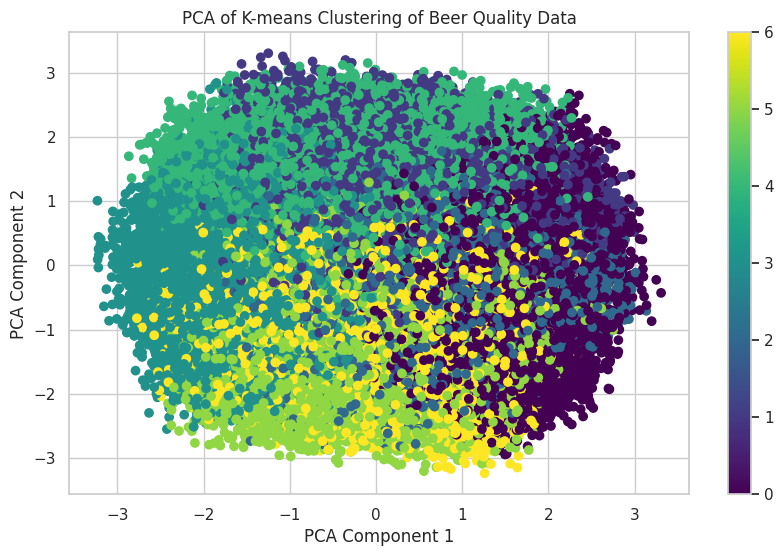

Data transformation execution time: 50.05 seconds


In [19]:
# Start the timer
start_time = time.time()

from pyspark.ml.feature import PCA, VectorAssembler, StandardScaler
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from sklearn.manifold import TSNE

# Select relevant features for clustering
clustering_features = beer_sample_set.select('Temperature', 'Fermentation_Time', 'pH_Level', 'Alcohol_Content', 'Bitterness', 'Color')

# Assemble the features into a single vector
assembler = VectorAssembler(inputCols=clustering_features.columns, outputCol='features')
assembled_data = assembler.transform(beer_sample_set)

# Normalize the features
scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withMean=True, withStd=True)
scaled_data = scaler.fit(assembled_data).transform(assembled_data)

# Apply KMeans clustering
num_clusters = 7  # Specify the number of clusters
kmeans = KMeans(k=num_clusters, seed=42, featuresCol='scaled_features', predictionCol='Cluster')
model = kmeans.fit(scaled_data)
clustered_data = model.transform(scaled_data)

# Apply PCA for dimensionality reduction
pca = PCA(k=2, inputCol='scaled_features', outputCol='pcaFeatures')
pca_model = pca.fit(clustered_data)
pca_data = pca_model.transform(clustered_data)

# Convert to Pandas for visualization
pca_data_pd = pca_data.select("pcaFeatures", "Cluster").toPandas()
pca_data_pd[['pca1', 'pca2']] = pd.DataFrame(pca_data_pd['pcaFeatures'].tolist(), index=pca_data_pd.index)

# Plot the PCA results with clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_data_pd['pca1'], pca_data_pd['pca2'], c=pca_data_pd['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA of K-means Clustering of Beer Quality Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


In [20]:
# Start the timer
start_time = time.time()

# Convert to Pandas DataFrame for t-SNE and visualization
#clustered_data_pd = clustered_data.select('scaled_features', 'Cluster').toPandas()

# Convert the scaled features to a numpy array
#features_array = np.array(clustered_data_pd['scaled_features'].tolist())

# Apply t-SNE for dimensionality reduction
#tsne = TSNE(n_components=2, random_state=42)
#clustering_features_tsne = tsne.fit_transform(features_array)

# Add the t-SNE components to the Pandas DataFrame
#clustered_data_pd['TSNE_1'] = clustering_features_tsne[:, 0]
#clustered_data_pd['TSNE_2'] = clustering_features_tsne[:, 1]

# Plot the clusters
#plt.figure(figsize=(10, 6))
#scatter = plt.scatter(clustered_data_pd['TSNE_1'], clustered_data_pd['TSNE_2'], c=clustered_data_pd['Cluster'], cmap='viridis')
#plt.colorbar(scatter)
#plt.title('K-means Clustering of Beer Quality Data')
#plt.xlabel('TSNE Component 1')
#plt.ylabel('TSNE Component 2')
#plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Data transformation execution time: 0.00 seconds


In [21]:
# Start the timer
start_time = time.time()

# Sample 2.5% of the rows with a seed for reproducibility
#test_beer_quality_predict = beer_quality_predict.sample(frac=0.10, random_state=42)

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Data transformation execution time: 0.00 seconds


In [22]:
# Start the timer
start_time = time.time()

# Display the schema of the DataFrame
beer_sample_set.printSchema()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

root
 |-- Batch_ID: integer (nullable = true)
 |-- Brew_Date: timestamp (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- pH_Level: double (nullable = true)
 |-- Gravity: double (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: integer (nullable = true)
 |-- Total_Sales: double (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Brewhouse_Efficiency: double (nullable = true)
 |-- Loss_During_Brewing: double (nullable = true)
 |-- Loss_During_Fermentation: double (nullable = true)
 |-- Loss_During_Bottling_Kegging: double (nullable = true)

Data transformation execution time: 0.00 seconds


In [23]:
# Start the timer
start_time = time.time()

from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Data transformation execution time: 0.00 seconds


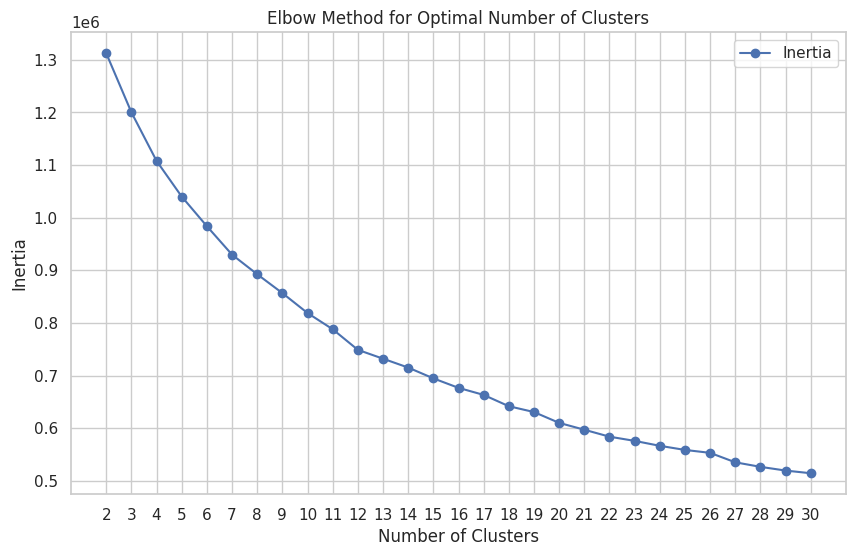

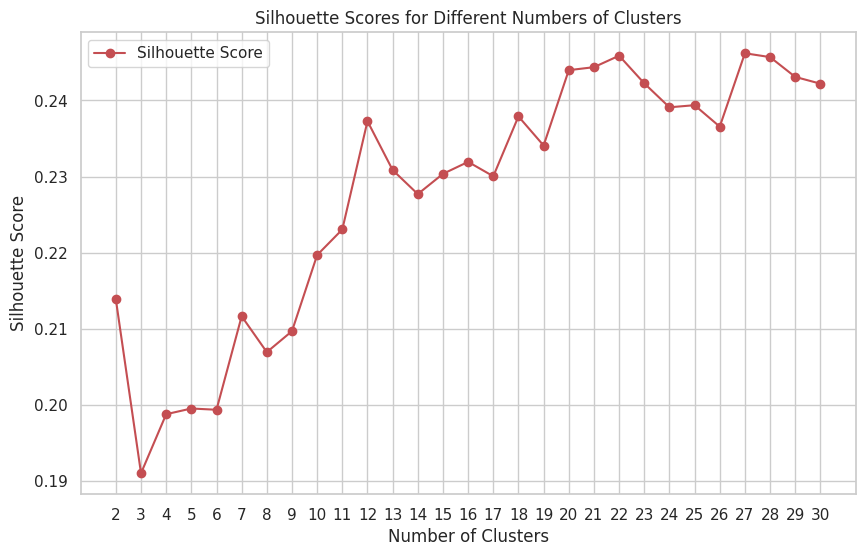

Data transformation execution time: 647.23 seconds


In [24]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Select relevant features for clustering
clustering_features = ['Temperature', 'Fermentation_Time', 'pH_Level', 'Alcohol_Content', 'Bitterness', 'Color']

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=clustering_features, outputCol="features")
beer_assembled = assembler.transform(beer_encoded)

# Normalize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(beer_assembled)
beer_scaled = scaler_model.transform(beer_assembled)

# Convert to pandas DataFrame for silhouette score calculation
#beer_scaled_pd = beer_scaled.select("scaled_features").toPandas()
#clustering_features_normalized = pd.DataFrame(beer_scaled_pd['scaled_features'].values.tolist(), index=beer_scaled_pd.index)

# Define the range of clusters to test
min_clusters = 2
max_clusters = 30

# Store inertia and silhouette scores for different cluster sizes
inertia_values = []
silhouette_scores = []

# ClusteringEvaluator to calculate silhouette scores
evaluator = ClusteringEvaluator(featuresCol='scaled_features', metricName='silhouette', distanceMeasure='squaredEuclidean')

# Iterate over the range of clusters
for k in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(k=k, seed=42, featuresCol="scaled_features")
    kmeans_model = kmeans.fit(beer_scaled)

    # Make predictions
    predictions = kmeans_model.transform(beer_scaled)

    # Append inertia (sum of squared distances to nearest cluster center)
    inertia_values.append(kmeans_model.summary.trainingCost)

    # Calculate silhouette score
    silhouette_avg = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette_avg)

# Plot the inertia values to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o', linestyle='-', color='b', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.legend()
plt.show()

# Plot the silhouette scores to further validate the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='r', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(range(2, max_clusters + 1))
plt.grid(True)
plt.legend()
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


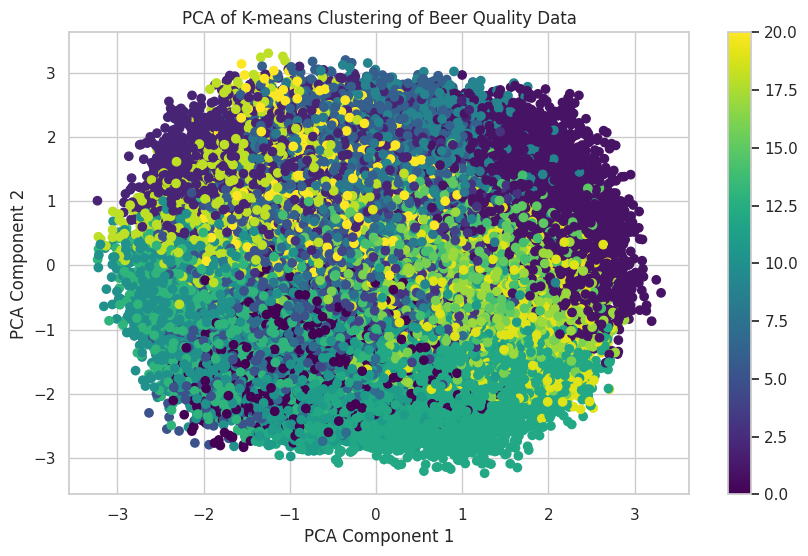

Data transformation execution time: 46.70 seconds


In [25]:
# Start the timer
start_time = time.time()

from pyspark.ml.feature import PCA, VectorAssembler, StandardScaler

# Select relevant features for clustering
clustering_features = ['Temperature', 'Fermentation_Time', 'pH_Level', 'Alcohol_Content', 'Bitterness', 'Color']

# VectorAssembler to combine feature columns into a single vector column
assembler = VectorAssembler(inputCols=clustering_features, outputCol='features')
beer_assembled = assembler.transform(beer_encoded)

# Normalize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(beer_assembled)
beer_scaled = scaler_model.transform(beer_assembled)

# Apply KMeans clustering
num_clusters = 21  # Specify the number of clusters
kmeans = KMeans(k=num_clusters, seed=42, featuresCol='scaled_features', predictionCol='Cluster')
kmeans_model = kmeans.fit(beer_scaled)
beer_clustered = kmeans_model.transform(beer_scaled)

# Apply PCA
pca = PCA(k=2, inputCol="scaled_features", outputCol="pcaFeatures")
pca_model = pca.fit(beer_clustered)
beer_pca = pca_model.transform(beer_clustered)

# Convert to Pandas for visualization
beer_pca_pd = beer_pca.select("pcaFeatures", "Cluster").toPandas()
beer_pca_pd[['pca1', 'pca2']] = pd.DataFrame(beer_pca_pd['pcaFeatures'].tolist(), index=beer_pca_pd.index)

# Plot the PCA results with clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(beer_pca_pd['pca1'], beer_pca_pd['pca2'], c=beer_pca_pd['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('PCA of K-means Clustering of Beer Quality Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


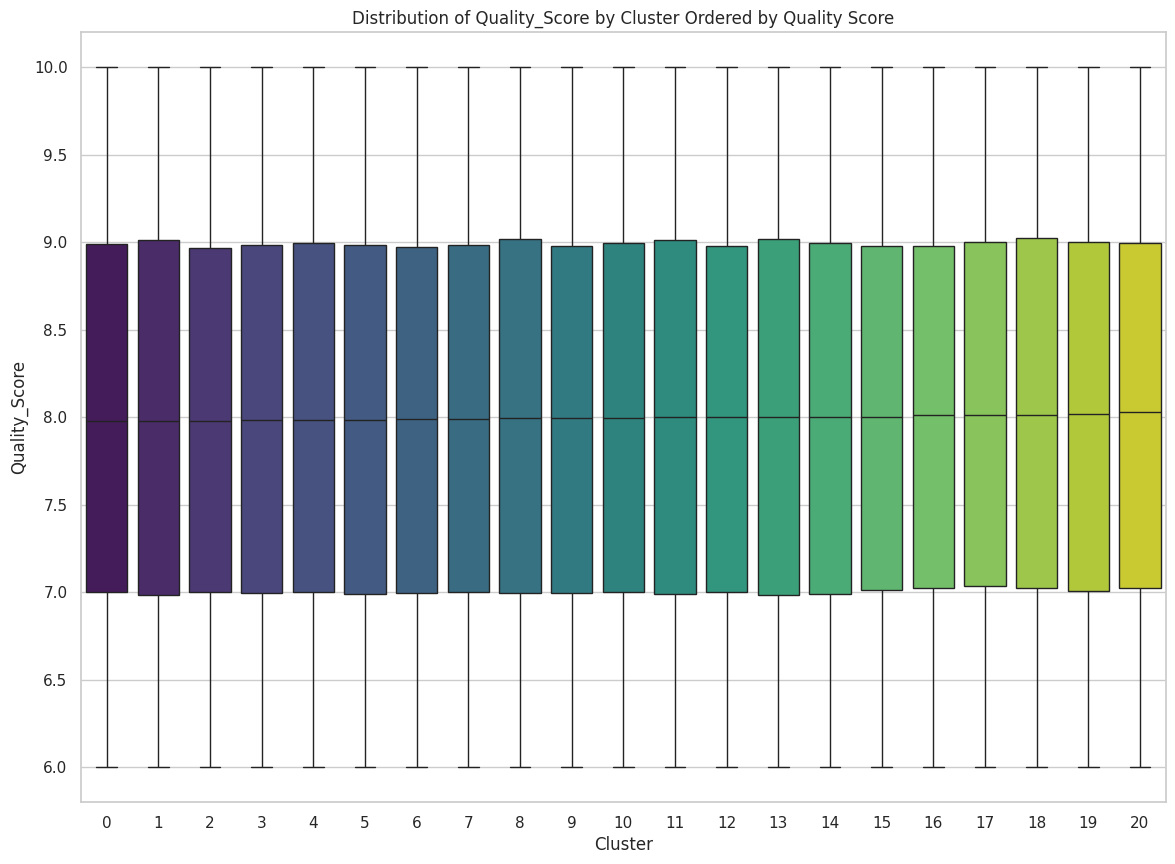

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


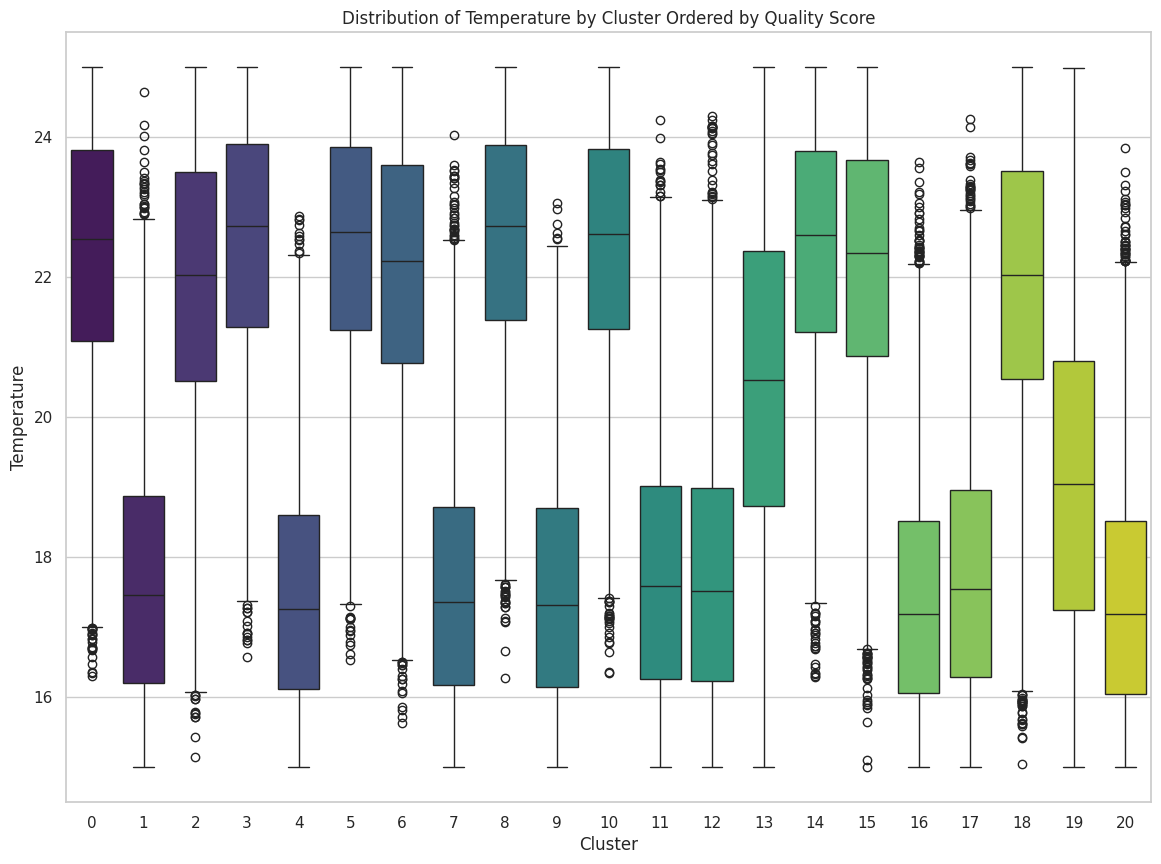

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


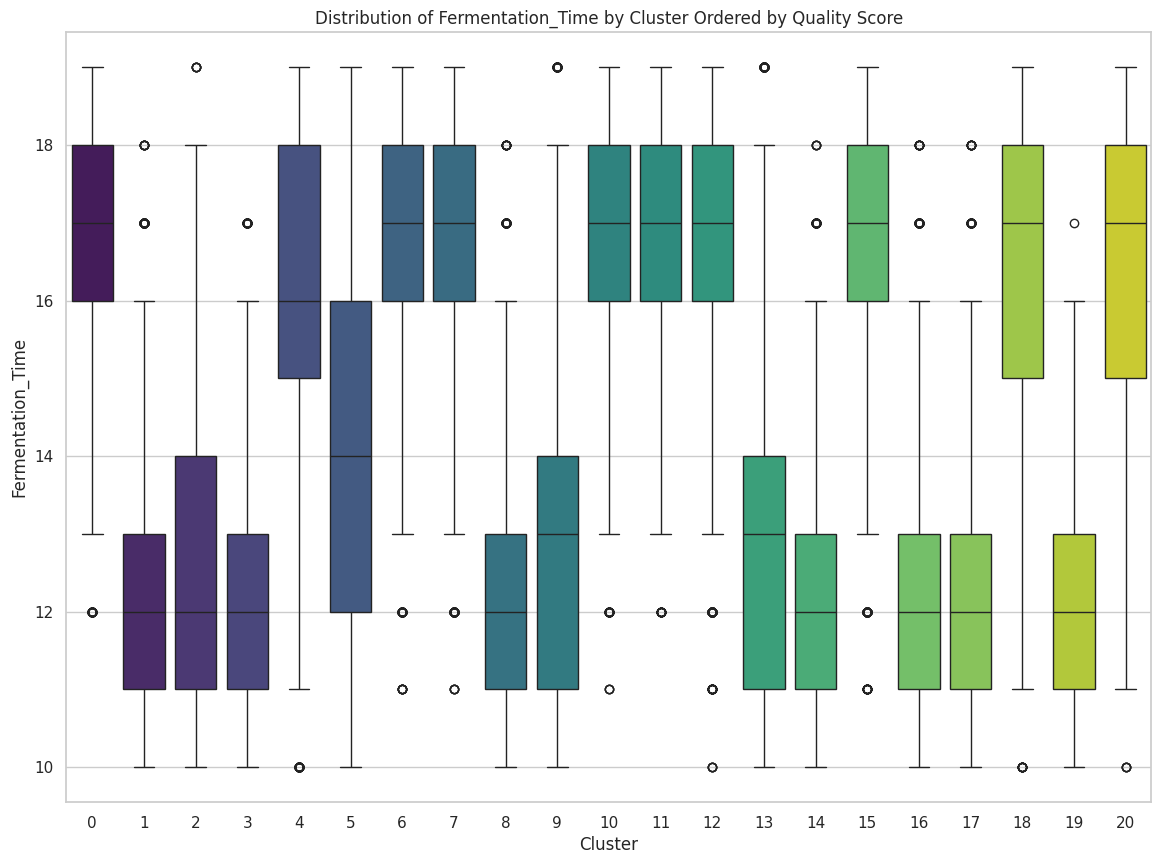

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


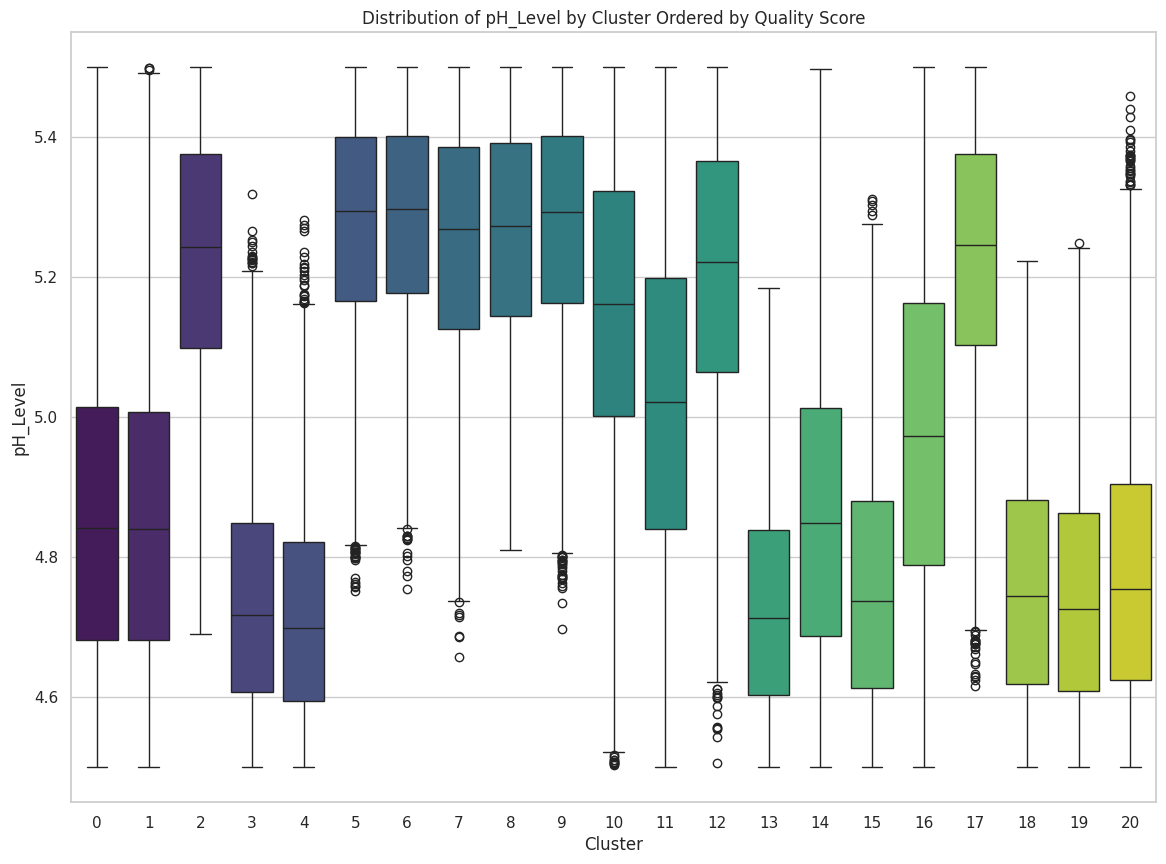

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


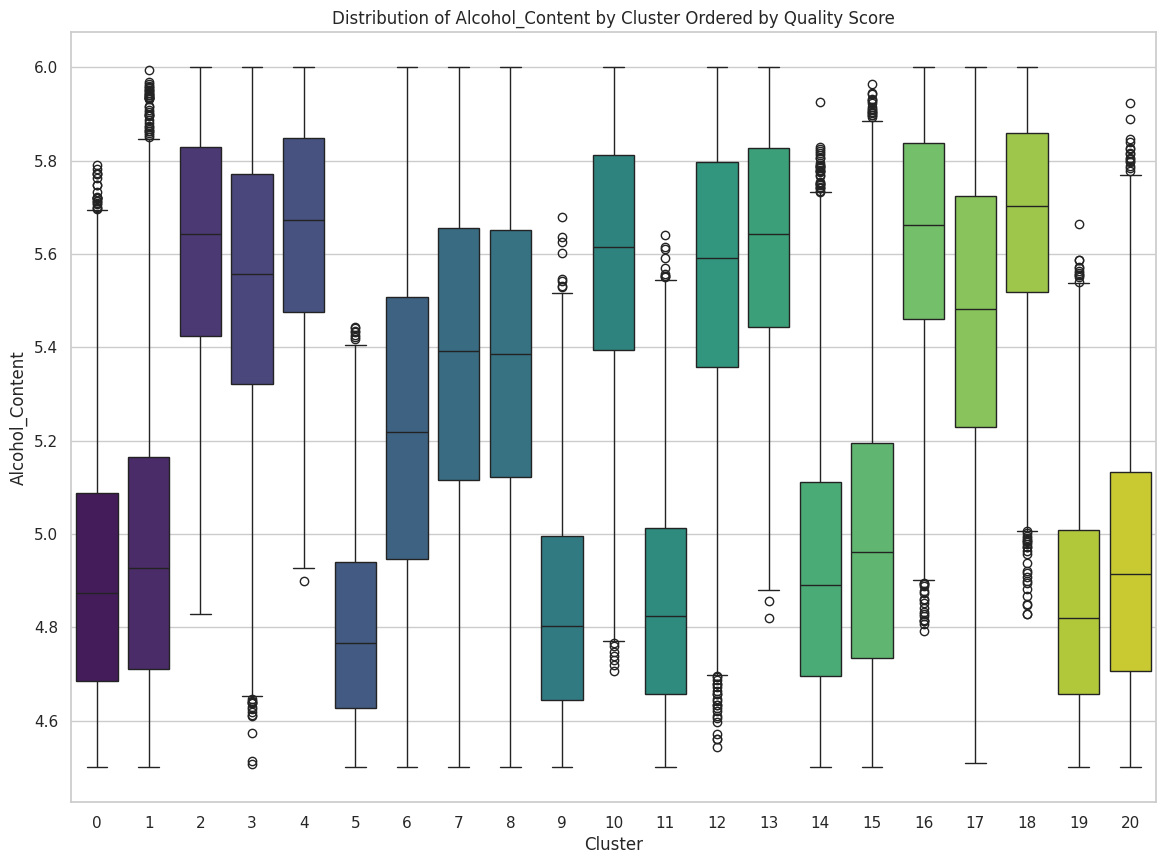

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


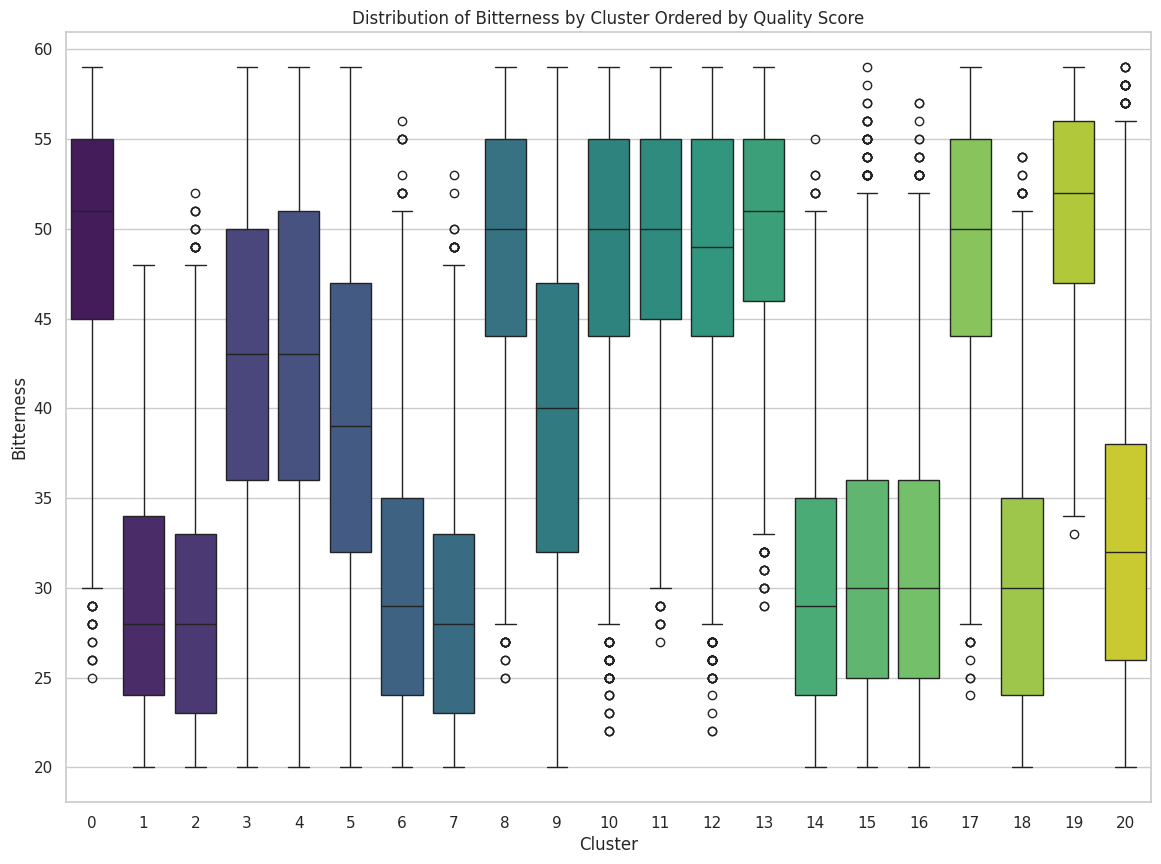

<ipython-input-26-5757979bdb68>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')


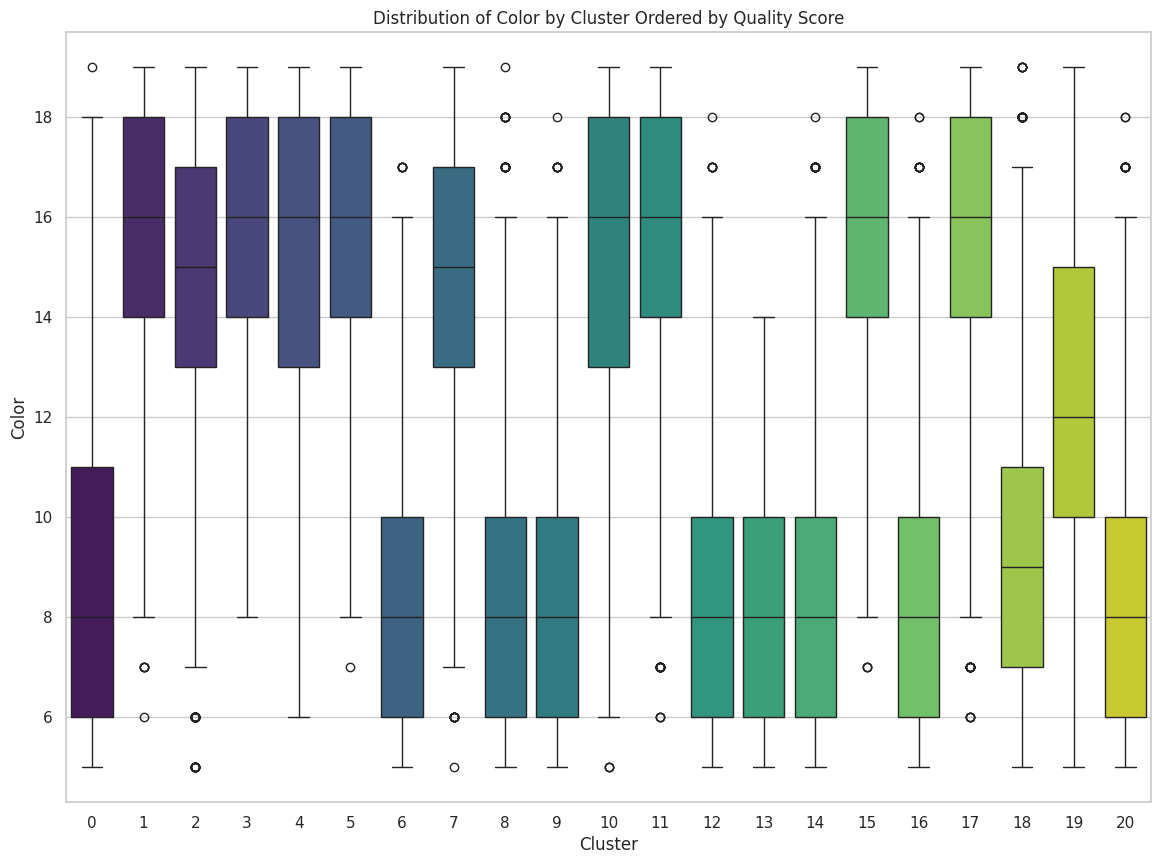

Data transformation execution time: 74.05 seconds


In [26]:
# Start the timer
start_time = time.time()

from pyspark.sql.functions import col, when, count, lit
from pyspark.sql import Window
from pyspark.sql.functions import expr


# Calculate the median quality score for each cluster
cluster_medians = beer_clustered.groupBy('Cluster').agg(expr('percentile_approx(Quality_Score, 0.5)').alias('median_Quality_Score'))
cluster_order = [row['Cluster'] for row in cluster_medians.orderBy('median_Quality_Score').collect()]

# Create a new column 'Cluster_Order' with the ordered cluster categories
cluster_mapping_expr = when(col('Cluster') == cluster_order[0], lit(0))
for i, cluster in enumerate(cluster_order[1:], 1):
    cluster_mapping_expr = cluster_mapping_expr.when(col('Cluster') == cluster, lit(i))

beer_clustered = beer_clustered.withColumn('Cluster_Order', cluster_mapping_expr)

# Convert the 'Cluster_Order' column to integer type
beer_clustered = beer_clustered.withColumn('Cluster_Order', col('Cluster_Order').cast('int'))

# Convert the DataFrame to Pandas for plotting
beer_clustered_pd = beer_clustered.toPandas()

# Ensure the DataFrame is sorted by Cluster_Order
beer_clustered_pd = beer_clustered_pd.sort_values(by='Cluster_Order') #doesn't seem to be working

# Plot the box plots using the ordered clusters
features_to_plot = ['Quality_Score', 'Temperature', 'Fermentation_Time', 'pH_Level', 'Alcohol_Content', 'Bitterness', 'Color']

for feature in features_to_plot:
    plt.figure(figsize=(14, 10))
    sns.boxplot(x='Cluster_Order', y=feature, data=beer_clustered_pd, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster Ordered by Quality Score')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [27]:
# Start the timer
start_time = time.time()

# Display the schema of the DataFrame
beer_encoded.printSchema()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

root
 |-- pH_Level: double (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Fermentation_Time: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Alcohol_Content: double (nullable = true)
 |-- Bitterness: integer (nullable = true)
 |-- Color: integer (nullable = true)
 |-- Quality_Score: double (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- Water_Ratio: double (nullable = false)
 |-- Malt_Ratio: float (nullable = true)
 |-- Hops_Ratio: float (nullable = true)
 |-- Malt_Hops_Ratio: double (nullable = true)
 |-- Malt_Type: string (nullable = false)
 |-- Hops_Type: string (nullable = false)
 |-- Beer_Style_Index: double (nullable = false)
 |-- Beer_Style_Vec: vector (nullable = true)
 |-- Malt_Type_Index: double (nullable = false)
 |-- Malt_Type_Vec: vector (nullable = true)
 |-- Hops_Type_Index: double (nullable = false)
 |-- Hops_Type_Vec: vector (nullable = true)

Data transformation execution time: 0.01 seconds


In [28]:
# Start the timer
start_time = time.time()

# Define the feature columns (use the correct encoded column names)
feature_columns = ['Malt_Ratio', 'Hops_Ratio', 'pH_Level', 'Fermentation_Time', 'Temperature',
                   'Alcohol_Content', 'Bitterness', 'Color', 'Beer_Style_Vec', 'Malt_Type_Vec',
                   'Hops_Type_Vec']

# Assemble the feature columns into a feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
beer_encoded = assembler.transform(beer_encoded)

# Select the features and label columns
data = beer_encoded.select("features", col("Quality_Score").alias("label"))

# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Print the count of rows in the training and testing sets
print(f"Training set size: {train_data.count()}")
print(f"Test set size: {test_data.count()}")

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


Training set size: 199992
Test set size: 50008
Data transformation execution time: 11.30 seconds


In [ ]:
# Start the timer
start_time = time.time()

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

# Define the RandomForestRegressor
rf = RandomForestRegressor(featuresCol='features', labelCol='label', seed=42)

# Define the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [300, 600, 900]) \
    .addGrid(rf.maxDepth, [10, 20, 30]) \
    .addGrid(rf.minInstancesPerNode, [1, 2, 4]) \
    .build()

# Define the evaluator
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='r2')

# Define the CrossValidator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3,
                          parallelism=4)

# Fit the model
cvModel = crossval.fit(train_data)

# Get the best model
best_rf_model = cvModel.bestModel

# Predict on the test set
predictions = best_rf_model.transform(test_data)

# Evaluate the best model on the test set
r2_score_best = evaluator.evaluate(predictions)
print(f"R^2 score of the best model: {r2_score_best}")

# Feature importances
importances = best_rf_model.featureImportances

# Plot feature importances

# Convert feature importances to a pandas DataFrame
importances_df = pd.DataFrame(importances.toArray(), index=feature_columns, columns=['Importance'])

# Plot the feature importances
plt.figure(figsize=(14, 8))
importances_df.sort_values(by='Importance', ascending=False).plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [ ]:
# Start the timer
start_time = time.time()

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Define the features and label
feature_columns = ['Malt_Ratio', 'Hops_Ratio', 'pH_Level', 'Fermentation_Time', 'Temperature',
                   'Alcohol_Content', 'Bitterness', 'Color', 'Beer_Style_Vec', 'Malt_Type_Vec',
                   'Hops_Type_Vec']

# Assemble features into a single vector column
assembler = VectorAssembler(inputCols=features, outputCol="features")
beer_encoded = assembler.transform(beer_encoded)

# Select the features and label
beer_encoded = beer_encoded.select("features", "Quality_Score")

# Split the data into training and testing sets
train_data, test_data = beer_encoded.randomSplit([0.8, 0.2], seed=42)

# Initialize the Gradient Boosting Regressor
gbr = GBTRegressor(featuresCol="features", labelCol="Quality_Score", seed=42)

# Define the parameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(gbr.maxIter, [100, 200, 300]) \
    .addGrid(gbr.maxDepth, [3, 4, 5]) \
    .addGrid(gbr.stepSize, [0.01, 0.05, 0.1]) \
    .build()

# Define the evaluator
evaluator = RegressionEvaluator(labelCol="Quality_Score", predictionCol="prediction", metricName="r2")

# Initialize CrossValidator
crossval = CrossValidator(estimator=gbr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3,
                          parallelism=4)

# Fit the model
cvModel = crossval.fit(train_data)

# Get the best model
best_gbr_model = cvModel.bestModel

# Predict on the test set
predictions = best_gbr_model.transform(test_data)

# Evaluate the model
r2_score_best = evaluator.evaluate(predictions)
print(f"R^2 score of the best Gradient Boosting model: {r2_score_best}")

# Feature importances
importances = best_gbr_model.featureImportances

# Plot feature importances
import matplotlib.pyplot as plt
import pandas as pd

# Convert feature importances to a pandas DataFrame
importances_df = pd.DataFrame(importances.toArray(), index=features, columns=['Importance'])

# Plot the feature importances
plt.figure(figsize=(14, 8))
importances_df.sort_values(by='Importance', ascending=False).plot(kind='bar')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.ylabel('Importance Score')
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [ ]:
|# Start the timer
start_time = time.time()

 # Buffer capacities based on malt and hops types
malt_buffer_capacities = {
    'Barley': 0.1,
    'Wheat': 0.2,
    'Rye': 0.15,
    'Oats': 0.05
}

hops_buffer_capacities = {
    'Bittering': 0.2,
    'Dual Purpose': 0.1,
    'Aroma': 0.05
}

def buffer_system_with_types(final_pH, malt_type, hops_type, malt_ratio, hops_ratio):
    # Phosphate buffer example
    H2PO4 = Substance.from_formula('H2PO4-')
    HPO4 = Substance.from_formula('HPO4(2-)')
    H = Substance.from_formula('H+')

    eq = Equilibrium({'H2PO4-': 1}, {'H+': 1, 'HPO4(2-)': 1}, 10**-7.2)  # pKa = 7.2

    # Get buffering capacities based on malt and hops types
    malt_buffer = malt_buffer_capacities.get(malt_type, 0.1)
    hops_buffer = hops_buffer_capacities.get(hops_type, 0.1)

    concentrations = {
        'H2PO4-': malt_ratio * malt_buffer,
        'HPO4(2-)': hops_ratio * hops_buffer
    }

    def residual(H_conc):
        concentrations['H+'] = H_conc
        return eq.lhs(concentrations) - eq.rhs(concentrations)

    H_initial, = fsolve(residual, 10**-final_pH)
    initial_pH = -np.log10(H_initial)

    return initial_pH

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [ ]:
# Start the timer
start_time = time.time()

 # Assuming `beer_quality_predict` is your DataFrame with inferred malt and hops types
beer_quality_predict['Estimated_Initial_pH'] = beer_quality_predict.apply(
    lambda row: buffer_system_with_types(
        row['pH_Level'],
        row['Malt_Type'],
        row['Hops_Type'],
        row['Malt_Ratio'],
        row['Hops_Ratio']
    ), axis=1
)

# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality_Score', y='Estimated_Initial_pH', data=beer_quality_predict)
plt.title('Estimated Initial pH Impact on Beer Quality')
plt.xlabel('Quality Score')
plt.ylabel('Estimated Initial pH')
plt.show()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

Buffer Capacities: Different malt and hops types have different buffering capacities, affecting the pH differently.
Dynamic Calculation: By incorporating malt and hops types into the buffer system calculation, you can dynamically adjust the buffering capacity based on the specific ingredients used.
Improved Understanding: This method provides a more detailed understanding of how initial pH and buffering capacities impact the final beer quality.

In [ ]:
# Start the timer
start_time = time.time()

# Apply initial pH calculation
def calculate_initial_ph(final_pH, malt_type, hops_type, malt_ratio, hops_ratio):
    return float(buffer_system_with_types(final_pH, malt_type, hops_type, malt_ratio, hops_ratio))

calculate_initial_ph_udf = F.udf(lambda final_pH, malt_type, hops_type, malt_ratio, hops_ratio:
                                 calculate_initial_ph(final_pH, malt_type, hops_type, malt_ratio, hops_ratio), FloatType())

beer_encoded = beer_encoded.withColumn('Initial_pH',
                                       calculate_initial_ph_udf(col('pH_Level'),
                                                                col('Malt_Type'),
                                                                col('Hops_Type'),
                                                                col('Malt_Ratio'),
                                                                col('Hops_Ratio')))

# Convert to Pandas for neural network processing
beer_encoded_pd = beer_encoded.toPandas()

# Sample Data Preparation
X_sample = beer_encoded_pd[['Malt_Ratio', 'Hops_Ratio', 'pH_Level', 'Fermentation_Time', 'Temperature', 'Alcohol_Content', 'Bitterness', 'Color', 'Initial_pH']].values
y_sample = beer_encoded_pd['Quality_Score'].values

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")



for NN repeat code from GBT, Random forest (will look similar)
do a ton of layers.

In [ ]:
# Start the timer
start_time = time.time()

# PyTorch Dataset
class BeerDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = BeerDataset(X_train, y_train)
test_dataset = BeerDataset(X_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP Model with Batch Normalization and Dropout
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

model = MLP(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [ ]:
# Start the timer
start_time = time.time()

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=5, min_lr=1e-6, verbose=True)

# Training Loop with Early Stopping
num_epochs = 50
best_loss = float('inf')
patience = 10
trigger_times = 0

for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()

    # Evaluate on the test set
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    scheduler.step(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

    # Early stopping
    if test_loss < best_loss:
        best_loss = test_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping triggered!')
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [ ]:
# Start the timer
start_time = time.time()

# Final evaluation
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f'Final Test Loss: {test_loss:.4f}')

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")


In [ ]:
# Start the timer
start_time = time.time()

 # Stop Spark session
spark.stop()

 # Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print(f"Data transformation execution time: {elapsed_time:.2f} seconds")

In [ ]:
# Define the columns relevant for feature engineering
relevant_columns = ['pH_Level', 'Ingredient_Ratio', 'Fermentation_Time', 'Temperature',
                    'Alcohol_Content', 'Bitterness', 'Color', 'Quality_Score']
categorical_columns = ['Beer_Style']

# Create a subset of the data with relevant columns
df_subset = df[relevant_columns + categorical_columns].copy()

# Preview the subset of the data
print("Subset of the data with relevant columns:")
print(df_subset.head())


In [ ]:
# Function to infer malt type from color
def infer_malt(color):
    """
    Infers the type of malt based on the color of the beer.
    """
    if color < 10:
        return 'Barley'
    elif color < 20:
        return 'Wheat'
    elif color < 30:
        return 'Rye'
    else:
        return 'Oats'

# Function to infer hops type from bitterness
def infer_hops(bitterness):
    """
    Infers the type of hops based on the bitterness of the beer.
    """
    if bitterness > 40:
        return 'Bittering'
    elif bitterness > 20:
        return 'Dual Purpose'
    else:
        return 'Aroma'

# Function to infer yeast type from temperature
def infer_yeast(temperature):
    """
    Infers the type of yeast based on the fermentation temperature.
    """
    return 'Lager' if temperature < 10 else 'Ale'

# Apply feature engineering functions to infer malt, hops, and yeast types
df_subset['Malt_Type'] = df_subset['Color'].apply(infer_malt)
df_subset['Hops_Type'] = df_subset['Bitterness'].apply(infer_hops)
df_subset['Yeast_Type'] = df_subset['Temperature'].apply(infer_yeast)

# Preview the engineered features
print("Data with engineered features (Malt_Type, Hops_Type, Yeast_Type):")
print(df_subset.head())


In [ ]:
# One-hot encode categorical variables for machine learning models
df_encoded = pd.get_dummies(df_subset, columns=['Beer_Style', 'Malt_Type', 'Hops_Type', 'Yeast_Type'])

# Preview the one-hot encoded dataframe
print("One-hot encoded dataframe:")
print(df_encoded.head())


In [ ]:
# Example of feature engineering
df['Yeast_Type'] = df.apply(lambda row: 'Lager' if row['Temperature'] < 10 else 'Ale', axis=1)
def infer_malt(color):
    if color < 10:
        return 'Barley'
    elif color < 20:
        return 'Wheat'
    elif color < 30:
        return 'Rye'
    else:
        return 'Oats'
df['Malt_Type'] = df['Color'].apply(infer_malt)
def infer_hops(bitterness):
    if bitterness > 40:
        return 'Bittering'
    elif bitterness > 20:
        return 'Dual Purpose'
    else:
        return 'Aroma'
df['Hops_Type'] = df['Bitterness'].apply(infer_hops)


In [ ]:
# Analyze optimal combinations for different beer styles
df_analysis = df[['pH_Level', 'Ingredient_Ratio', 'Fermentation_Time', 'Temperature', 'Alcohol_Content', 'Bitterness', 'Quality_Score', 'Yeast_Type', 'Malt_Type', 'Hops_Type']]
df_analysis = pd.get_dummies(df_analysis, columns=['Yeast_Type', 'Malt_Type', 'Hops_Type'])
correlation_matrix = df_analysis.corr()
print(correlation_matrix['Quality_Score'].sort_values(ascending=False))


In [ ]:
!pip install chempy


In [ ]:
from chempy import Substance
from chempy.kinetics.ode import get_odesys
from chempy.kinetics.rates import MassAction

# Define substances
maltose = Substance.from_formula('C12H22O11')
glucose = Substance.from_formula('C6H12O6')
ethanol = Substance.from_formula('C2H5OH')
co2 = Substance.from_formula('CO2')

# Define a simple reaction: Maltose -> 2 Glucose
reaction = MassAction({'C12H22O11': 1}, {'C6H12O6': 2}, 1.0)

# Get ODE system
odesys, extra = get_odesys([reaction])

# Initial concentrations (mol/L)
concs = {maltose: 1.0}

# Time points (seconds)
t = [0, 3600, 7200, 10800]

# Solve ODEs
result = odesys.integrate(t, concs)

print(result.plot(concs.keys()))


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming `df_analysis` is your feature-engineered DataFrame
X = df_analysis[['pH_Level', 'Ingredient_Ratio', 'Fermentation_Time', 'Temperature', 'Alcohol_Content', 'Bitterness']]
y = df_analysis['Quality_Score']

model = RandomForestRegressor()
model.fit(X, y)

# Evaluate the model
print(model.score(X, y))


Optimal Use Cases for ChemPy in Brewing Analysis
pH and Mineral Content:

Use ChemPy to model how different mineral compositions in water (calcium, magnesium) affect the pH during mashing and how this influences enzyme activity and starch conversion.
Fermentation Dynamics:

Model fermentation reactions to understand how different yeast strains (temperature and fermentation time) convert sugars to alcohol and CO2, impacting the final quality and flavor profile of the beer.
Ingredient Interactions:

Analyze how different ratios of malts and hops interact chemically during the brewing process and their cumulative impact on beer quality.
Integrating ChemPy with Machine Learning
For more advanced analysis, integrate ChemPy with machine learning tools like scikit-learn to predict quality scores based on chemical composition and brewing conditions:

Feature Engineering:

Use ChemPy to calculate chemical properties (e.g., reaction rates, equilibrium constants) and use these as features for machine learning models.


References:

1. https://brookstonbeerbulletin.com/thinking-about-beer-color/
2. https://homebrewing.org/pages/srm-beer-color-scale
3. https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset/data
4. https://www.kaggle.com/code/diegoamd/brewery-dataset-eda-regression-and-clustering
5. https://blogs.cornell.edu/brewing/resources/
6. https://www.craftmasterstainless.com/blog/2023/11/21/a-guide-to-the-complex-chemistry-behind-beer-brewing
7. https://beaconhillsbrewhouse.wordpress.com/2011/09/18/water-chemistrys-influence-on-my-oktoberfest-beer/
8. https://spikebrewing.com/blogs/learn/primary-ingredients-for-brewing-beer
9. https://byo.com/article/understanding-residual-alkalinity-ph/
10. https://www.google.com/search?q=types+of+beer+yeast&sca_esv=f07dd38fdcfe8355&rlz=1C5CHFA_enUS504US504&ei=h0VwZt2lLuGeptQPxpuFiAE&ved=0ahUKEwidhcuH6uKGAxVhj4kEHcZNAREQ4dUDCBA&uact=5&oq=types+of+beer+yeast&gs_lp=Egxnd3Mtd2l6LXNlcnAaAhgDIhN0eXBlcyBvZiBiZWVyIHllYXN0MgsQABiABBiRAhiKBTIGEAAYFhgeMgYQABgWGB4yCRAAGBYYiwMYHjIJEAAYFhiLAxgeMgYQABgWGB4yBhAAGBYYHjILEAAYFhiLAxgeGA8yCRAAGBYYiwMYHjIJEAAYFhiLAxgeSOoVUJgEWLMTcAF4AZABAJgBjQGgAZsHqgEDNC41uAEDyAEA-AEBmAIKoAK9B8ICChAAGLADGNYEGEfCAgoQABiABBhDGIoFwgIOEAAYgAQYhgMYigUYiwPCAgsQABiABBiiBBiLA8ICBRAAGIAEwgIIEAAYFhgeGA_CAgsQABgWGAoYiwMYHsICCxAAGIAEGIYDGIoFwgIIEAAYgAQYogSYAwCIBgGQBgiSBwM1LjWgB5E8&sclient=gws-wiz-serp
11. https://www.micetgroup.com/the-business-competition-strategy-of-craft-brewery/
12. https://www.brewersassociation.org/directories/breweries/?location=United%20States&type=Regional
13. https://www.brewersassociation.org/programs/beer-food-program/
14. https://beersmith.com/blog/2016/02/11/the-sulfate-to-chloride-ratio-and-beer-bitterness/
15. https://www.nature.com/articles/s41467-024-46346-0
16. https://www.nature.com/scitable/topicpage/yeast-fermentation-and-the-making-of-beer-14372813/



